<a href="https://colab.research.google.com/github/paologordillo/CLASIFICACION-DE-ENFERMEDADES-DE-LA-HOJA-DE-MANGO/blob/main/CLASIFICACION_DE_ENFERMEDADES_DE_LA_HOJA_DE_MANGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#A60505; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Clasificación de enfermedades de la hoja del mango </div>

<center>
    <img src='https://1.bp.blogspot.com/-3NVFdJH0sY4/X1UbWI9xKMI/AAAAAAAADDM/qYt_kDpkJbw72ZXbmqz1u64X-VMEfIhlACLcBGAsYHQ/s640/Mango%2Banthracnose.jpg'>
</center>

<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Instalar Kaggle</b>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                           53KB  2023-12-06 04:54:33           1583         27  1.0              
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1772        178  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           7937        144  1.0              
jocelyndumlao/cardiovascular-disease-dataset           

In [ ]:
!kaggle datasets download 'warcoder/mango-leaf-disease-dataset'

 94% 97.0M/104M [00:01<00:00, 67.9MB/s]
100% 104M/104M [00:01<00:00, 68.3MB/s] 


In [ ]:
!unzip mango-leaf-disease-dataset.zip

Archive:  mango-leaf-disease-dataset.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20

In [ ]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> EDA (Analisis de Datos Exploratorios)</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Definir la ruta de datos y el nombre del conjunto de datos</b>

In [ ]:
data_dir = '/content/MangoLeafBD Dataset'
ds_name = 'Mango Leaf Disease'

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Crear marco de datos para el conjunto de datos</b>

In [ ]:
# Generate data paths with labels

def generate_data_paths(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [ ]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)

    return df

df = create_df(filepaths, labels)

In [ ]:
df.head()

,filepaths,labels
0,/content/MangoLeafBD Dataset/Powdery Mildew/IM...,Powdery Mildew
1,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
2,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
3,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
4,/content/MangoLeafBD Dataset/Powdery Mildew/IM...,Powdery Mildew


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Mostrar número de ejemplos en el conjunto de datos</b>

In [ ]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")

num_of_examples(df, ds_name)

The Mango Leaf Disease dataset has 4000 images.


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Mostrar número de clases en el conjunto de datos</b>

In [ ]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")

num_of_classes(df, ds_name)

The Mango Leaf Disease dataset has 8 classes


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Mostrar el recuento de imágenes en cada clase del conjunto de datos.</b>

In [ ]:
def classes_count(df, name='df'):

    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)

classes_count(df, ds_name)

The Mango Leaf Disease dataset has: 

Class 'Powdery Mildew' has 500 images
----------------------------------------------------------------------
Class 'Anthracnose' has 500 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 500 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 500 images
----------------------------------------------------------------------
Class 'Healthy' has 500 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 500 images
----------------------------------------------------------------------
Class 'Gall Midge' has 500 images
----------------------------------------------------------------------
Class 'Die Back' has 500 images
----------------------------------------------------------------------


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Visualice cada clase en el conjunto de datos</b>

In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "bar"}, {'type': 'pie'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=20),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors)),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')

<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Verifique los valores nulos en el marco de datos</b>

In [ ]:
def check_null_values(df, name='df'):

    num_null_vals = sum(df.isnull().sum().values)

    if not num_null_vals:
        print(f"The {name} dataset has no null values")

    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())


check_null_values(df, ds_name)

The Mango Leaf Disease dataset has no null values


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualizar valores nulos</b>

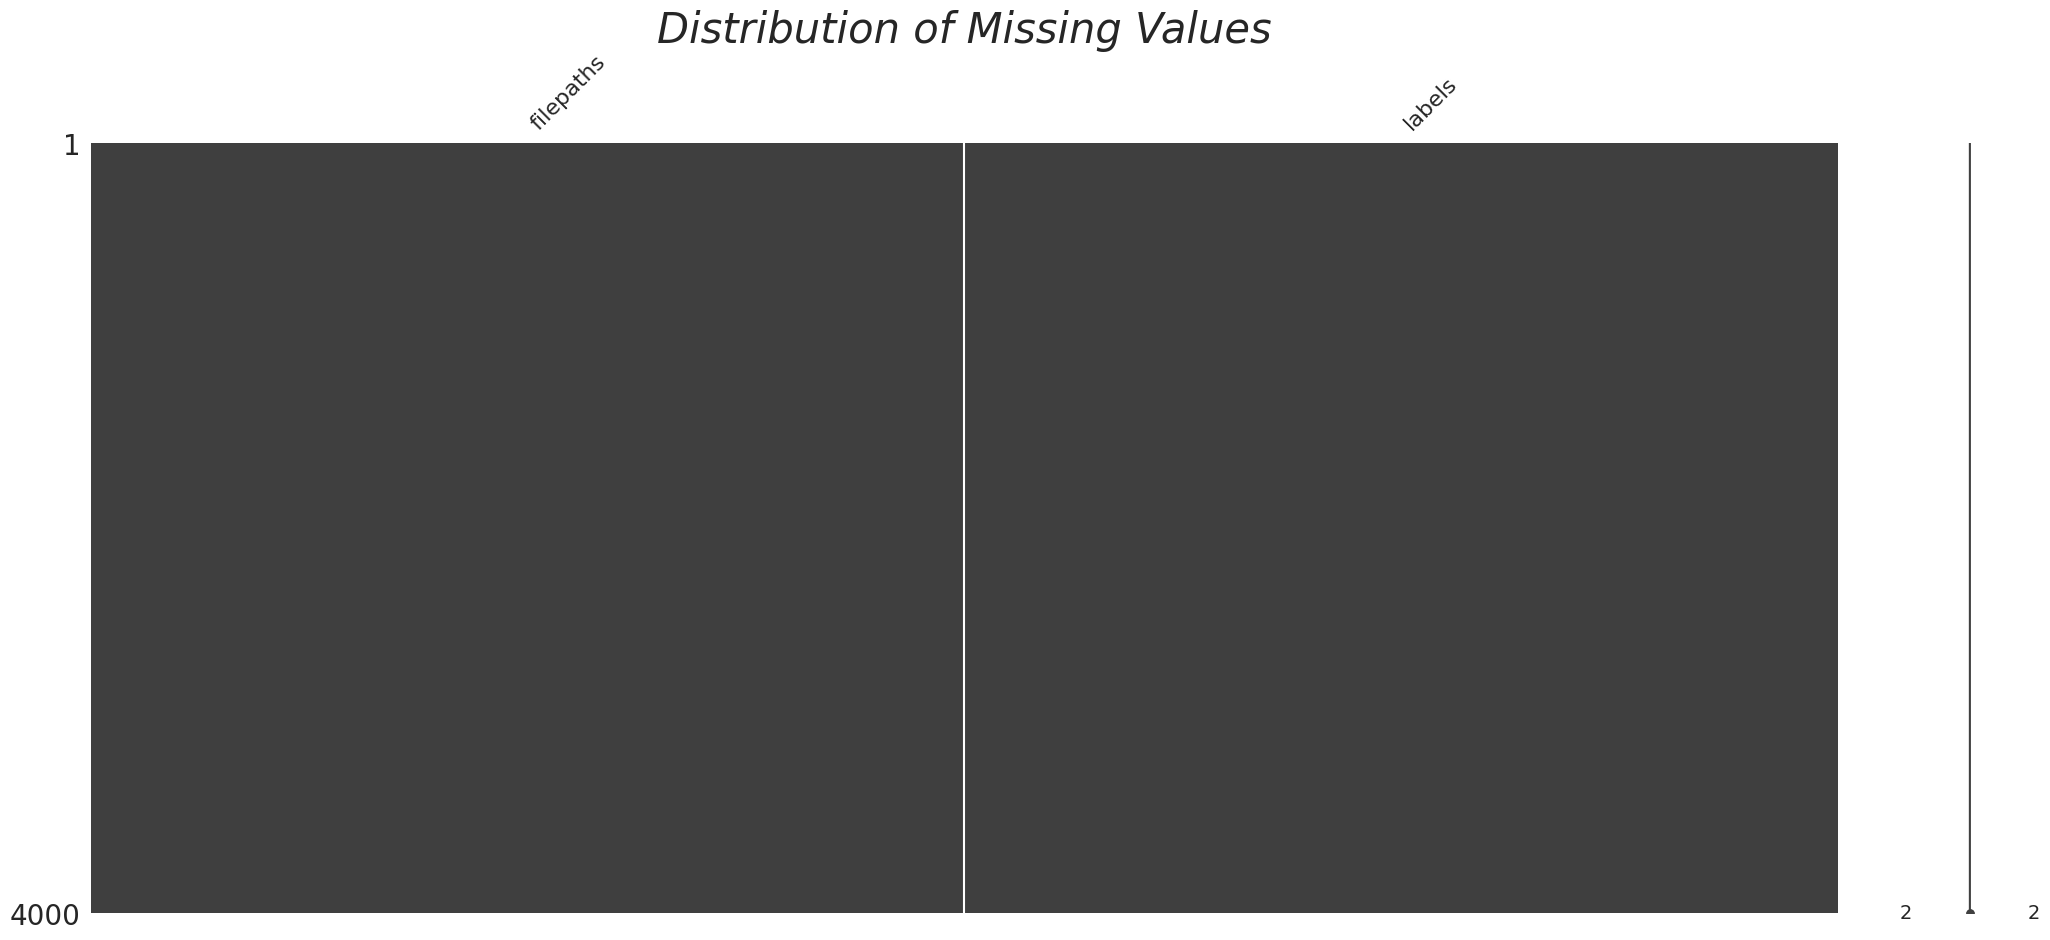

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span>Dividir el marco de datos en tren, válido y prueba</b>

In [ ]:
df.head()

,filepaths,labels
0,/content/MangoLeafBD Dataset/Powdery Mildew/IM...,Powdery Mildew
1,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
2,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
3,/content/MangoLeafBD Dataset/Powdery Mildew/20...,Powdery Mildew
4,/content/MangoLeafBD Dataset/Powdery Mildew/IM...,Powdery Mildew


In [ ]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [ ]:
def num_imgs(df, name='df'):
    print(f"Number of {name} dataset is {len(df)} images")

In [ ]:
num_imgs(train_df, 'Training '+ds_name)
num_imgs(valid_df, 'Validation '+ds_name)
num_imgs(test_df, 'Testing '+ds_name)

Number of Training Mango Leaf Disease dataset is 2800 images
Number of Validation Mango Leaf Disease dataset is 600 images
Number of Testing Mango Leaf Disease dataset is 600 images


In [ ]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Mango Leaf Disease dataset has 8 classes
The Validation Mango Leaf Disease dataset has 8 classes
The Testing Mango Leaf Disease dataset has 8 classes


In [ ]:
classes_count(train_df, 'Training '+ds_name)

The Training Mango Leaf Disease dataset has: 

Class 'Sooty Mould' has 354 images
----------------------------------------------------------------------
Class 'Gall Midge' has 353 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 348 images
----------------------------------------------------------------------
Class 'Powdery Mildew' has 365 images
----------------------------------------------------------------------
Class 'Healthy' has 365 images
----------------------------------------------------------------------
Class 'Die Back' has 343 images
----------------------------------------------------------------------
Class 'Anthracnose' has 322 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 350 images
----------------------------------------------------------------------


In [ ]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Mango Leaf Disease dataset has: 

Class 'Anthracnose' has 95 images
----------------------------------------------------------------------
Class 'Powdery Mildew' has 70 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 75 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 67 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 78 images
----------------------------------------------------------------------
Class 'Die Back' has 84 images
----------------------------------------------------------------------
Class 'Gall Midge' has 70 images
----------------------------------------------------------------------
Class 'Healthy' has 61 images
----------------------------------------------------------------------


In [ ]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Mango Leaf Disease dataset has: 

Class 'Powdery Mildew' has 65 images
----------------------------------------------------------------------
Class 'Die Back' has 73 images
----------------------------------------------------------------------
Class 'Bacterial Canker' has 74 images
----------------------------------------------------------------------
Class 'Anthracnose' has 83 images
----------------------------------------------------------------------
Class 'Sooty Mould' has 79 images
----------------------------------------------------------------------
Class 'Cutting Weevil' has 75 images
----------------------------------------------------------------------
Class 'Gall Midge' has 77 images
----------------------------------------------------------------------
Class 'Healthy' has 74 images
----------------------------------------------------------------------


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span>Crear generador de datos de imágenes</b>

In [ ]:
# crobed image size
batch_size = 40
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col = 'filepaths',
                                       y_col= 'labels',
                                       target_size = img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size=batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False,
                                      batch_size= test_batch_size)

Found 2800 validated image filenames belonging to 8 classes.
Found 600 validated image filenames belonging to 8 classes.
Found 600 validated image filenames belonging to 8 classes.


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Visualizar el conjunto de datos de entrenamiento</b>

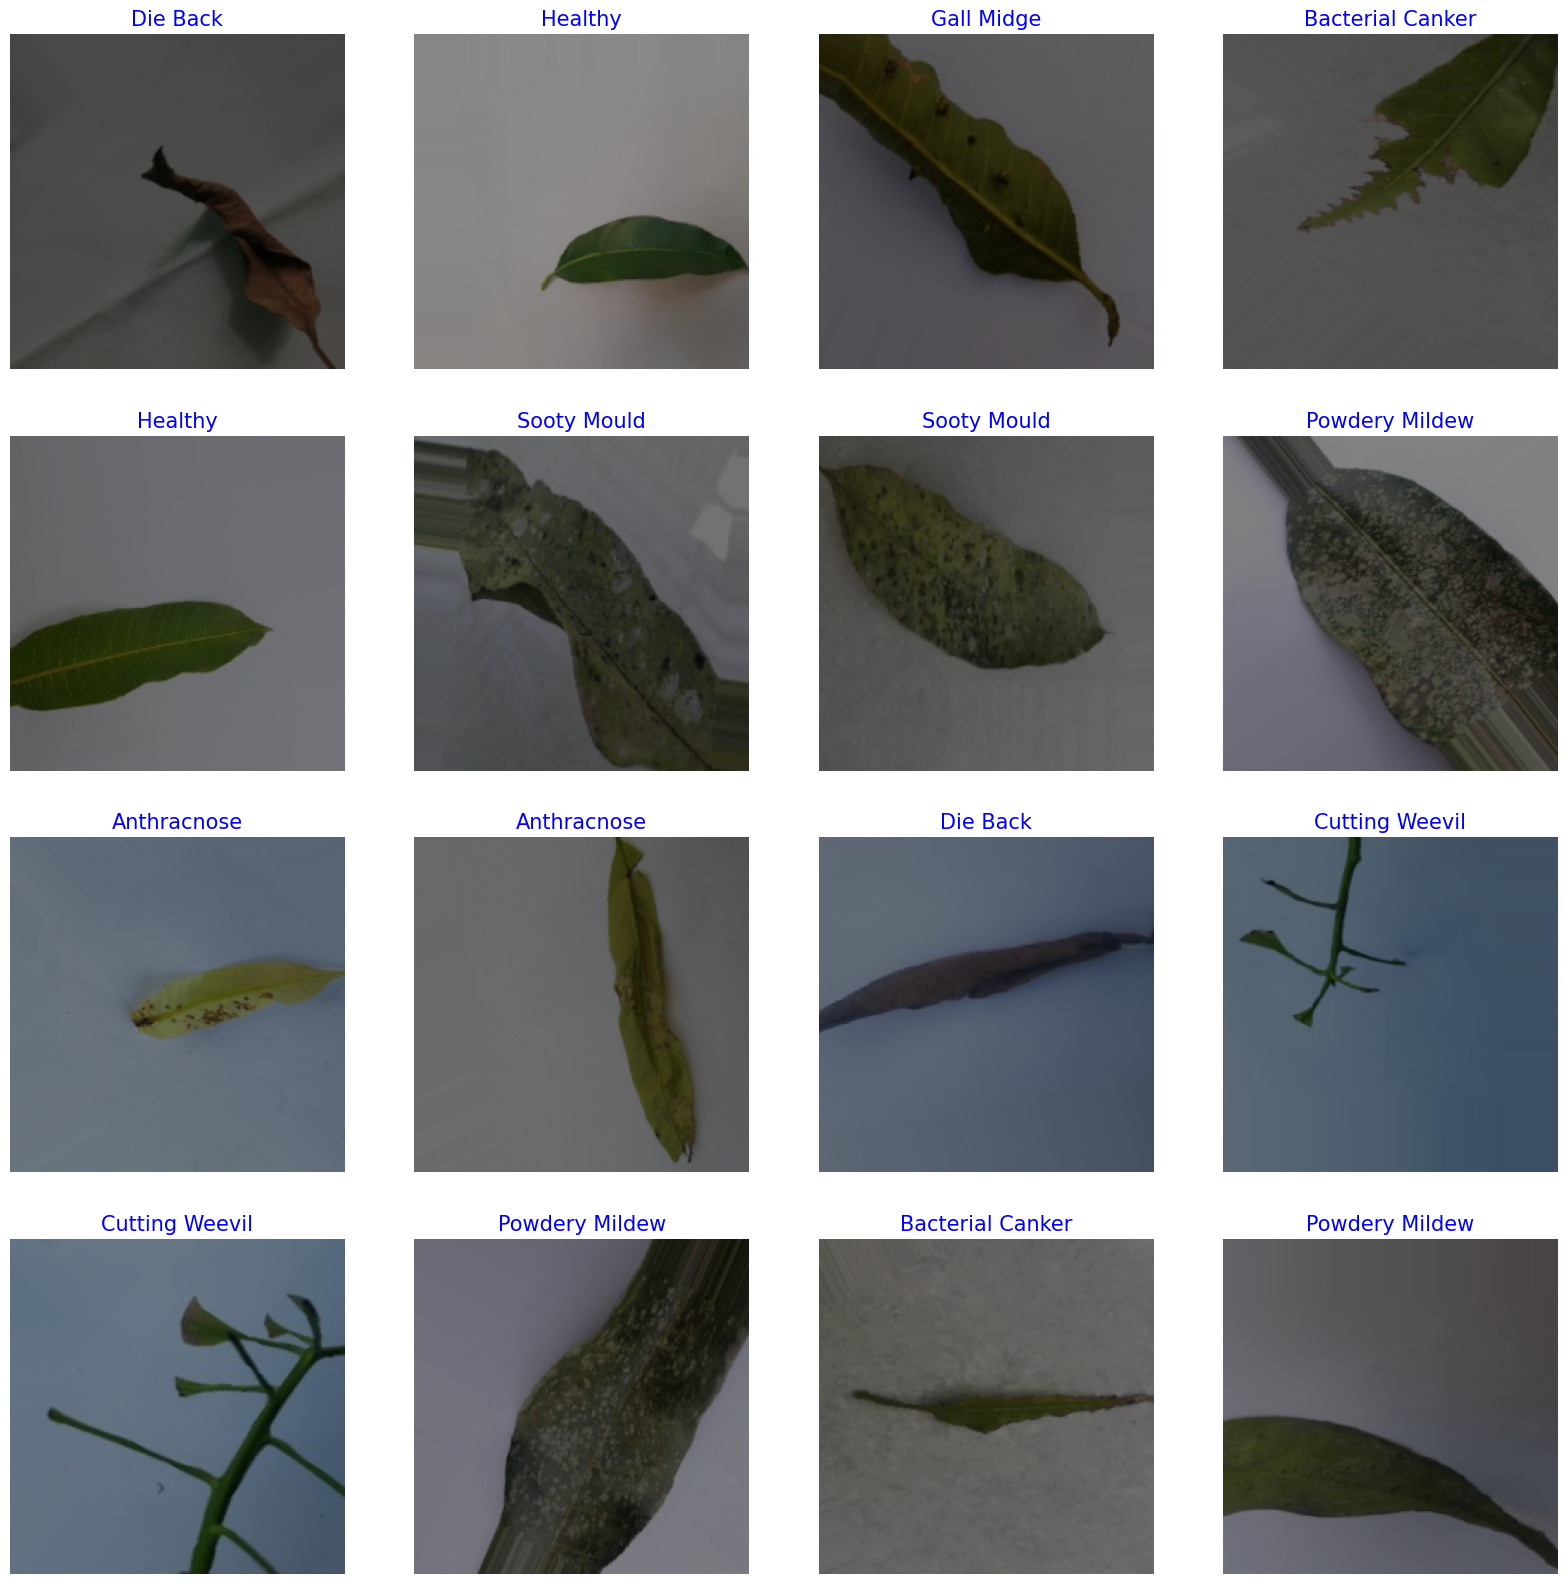

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):

    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 15)
    plt.axis('off')

plt.show()

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Estructura del modelo</b>

<a id="7.1"></a>
### <b>7.1 <span style='color:#B21010'>||</span>Creación de modelo genérico</b>

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb7 from EfficientNet family.

base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(128,kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation = 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

258076736/258076736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2560)              10240     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                       

<a id="7.2"></a>
### <b>7.2 <span style='color:#B21010'>||</span>Definir parada anticipada</b>

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               mode='min',
                              )

<a id="7.3"></a>
### <b>7.3 <span style='color:#B21010'>||</span>Modelo de entrenamiento</b>

In [ ]:
batch_size = 16   # set batch size for training
epochs = 10   # number of all epochs in training

history = model.fit(x=train_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = None,
                    shuffle = False,
                    batch_size = batch_size,
                    callbacks = [early_stopping])

Epoch 1/10
70/70 [==============================] - 1940s 27s/step - loss: 5.0222 - accuracy: 0.7071 - val_loss: 4.2736 - val_accuracy: 0.8550
Epoch 2/10
70/70 [==============================] - 1681s 24s/step - loss: 4.0745 - accuracy: 0.8443 - val_loss: 3.6790 - val_accuracy: 0.8933
Epoch 3/10
70/70 [==============================] - 1747s 25s/step - loss: 3.5381 - accuracy: 0.8793 - val_loss: 3.1695 - val_accuracy: 0.9433
Epoch 4/10
70/70 [==============================] - 1660s 24s/step - loss: 3.1151 - accuracy: 0.8954 - val_loss: 2.8117 - val_accuracy: 0.9383
Epoch 5/10
70/70 [==============================] - 1771s 25s/step - loss: 2.7531 - accuracy: 0.9111 - val_loss: 2.4947 - val_accuracy: 0.9483
Epoch 6/10
70/70 [==============================] - 1698s 24s/step - loss: 2.4257 - accuracy: 0.9243 - val_loss: 2.1771 - val_accuracy: 0.9650
Epoch 7/10
70/70 [==============================] - 1717s 25s/step - loss: 2.1623 - accuracy: 0.9214 - val_loss: 1.9556 - val_accuracy: 0.9500

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Evaluar modelo</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#B21010'>||</span>Trazar precisión y curva de pérdida </b>

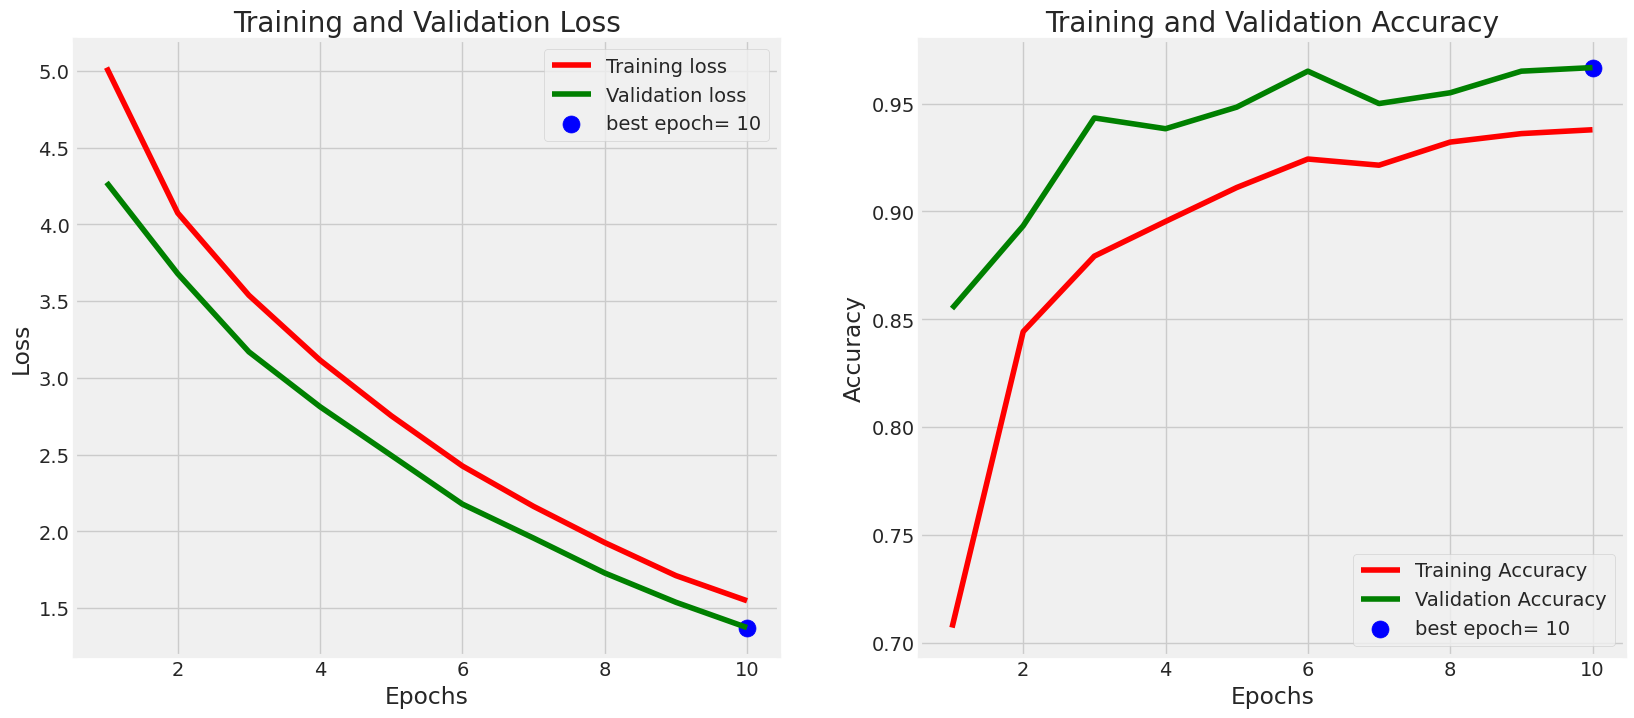

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<a id="8.2"></a>
### <b>8.2 <span style='color:#B21010'>||</span>Precisión del modelo</b>

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 315s 38s/step - loss: 1.4190 - accuracy: 0.9533
Train Loss:  1.3452391624450684
Train Accuracy:  0.981249988079071
--------------------
Validation Loss:  1.3851335048675537
Validation Accuracy:  0.956250011920929
--------------------
Test Loss:  1.418965220451355
Test Accuracy:  0.95333331823349


<a id="8.3"></a>
### <b>8.3 <span style='color:#B21010'>||</span>Obtener predicción</b>

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<a id="8.4"></a>
### <b>8.4 <span style='color:#B21010'>||</span>Matriz de confusión</b>

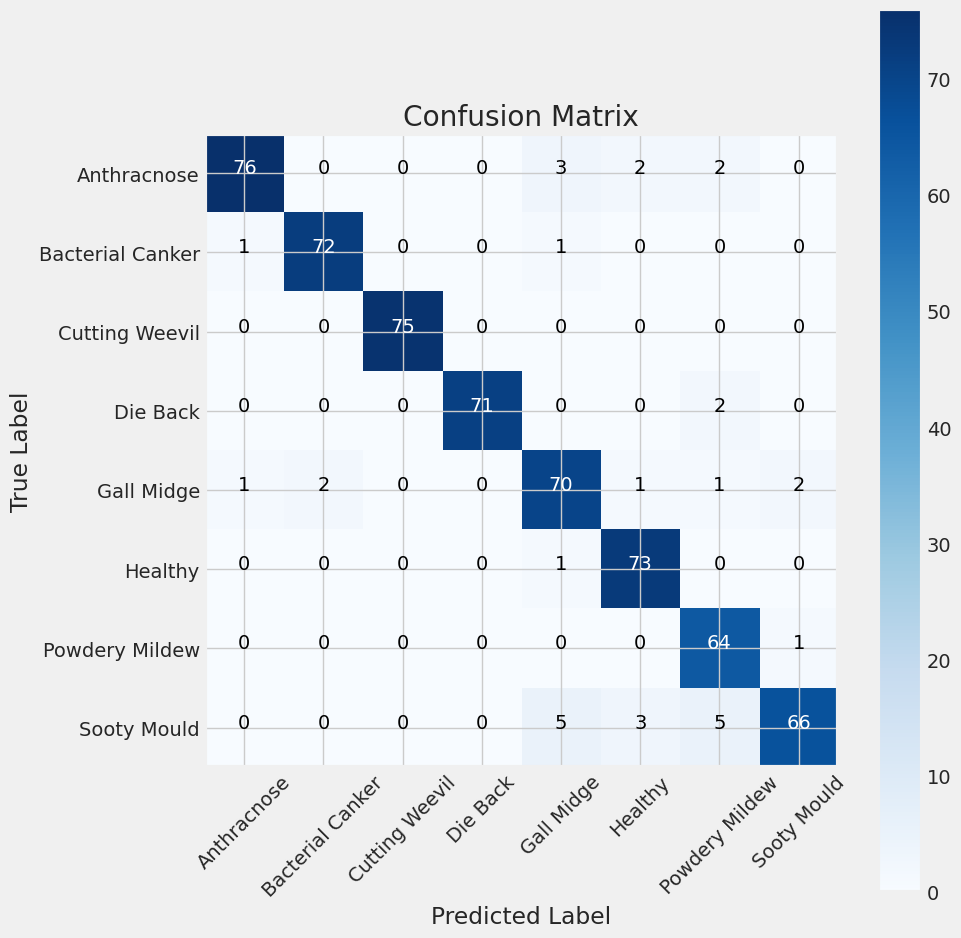

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="8.5"></a>
### <b>8.5 <span style='color:#B21010'>||</span>Informe de clasificación</b>

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

     Anthracnose       0.97      0.92      0.94        83
Bacterial Canker       0.97      0.97      0.97        74
  Cutting Weevil       1.00      1.00      1.00        75
        Die Back       1.00      0.97      0.99        73
      Gall Midge       0.88      0.91      0.89        77
         Healthy       0.92      0.99      0.95        74
  Powdery Mildew       0.86      0.98      0.92        65
     Sooty Mould       0.96      0.84      0.89        79

        accuracy                           0.94       600
       macro avg       0.95      0.95      0.95       600
    weighted avg       0.95      0.94      0.94       600



<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Guardar el modelo</b>

In [ ]:
model.save_weights('my_model_weights.h5')

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Cargar el modelo y predecir las entradas</b>

1/1 [==============================] - 7s 7s/step


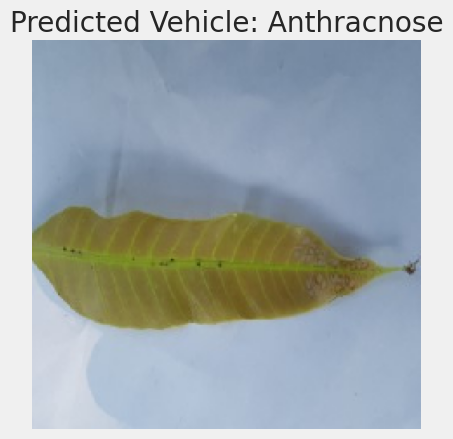

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Vehicle: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('/content/my_model_weights.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = list(train_gen.class_indices.keys())

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/content/MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)


1/1 [==============================] - 0s 400ms/step


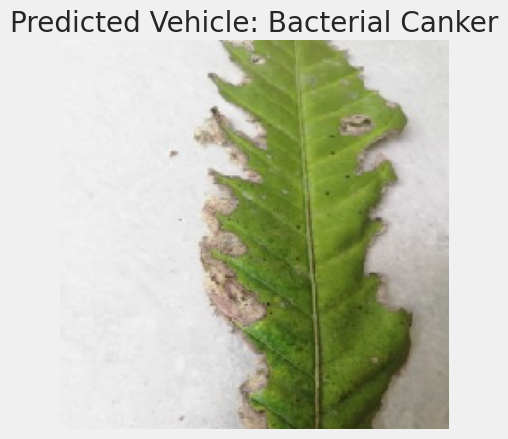

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Bacterial Canker/IMG_20211106_120951 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 679ms/step


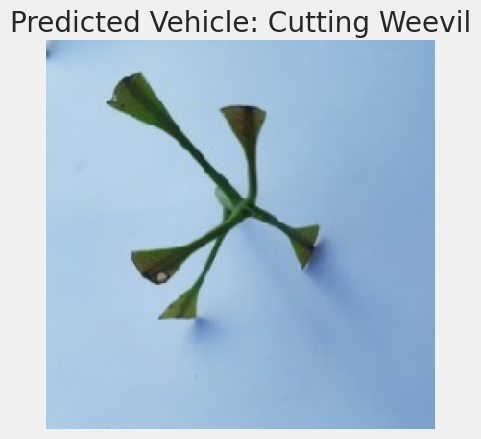

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Cutting Weevil/20211011_160708 (Custom) (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 894ms/step


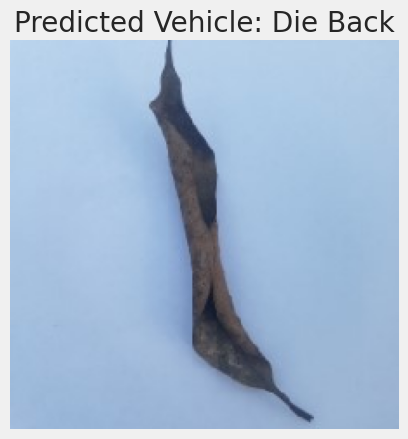

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Die Back/20211129_160627 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 643ms/step


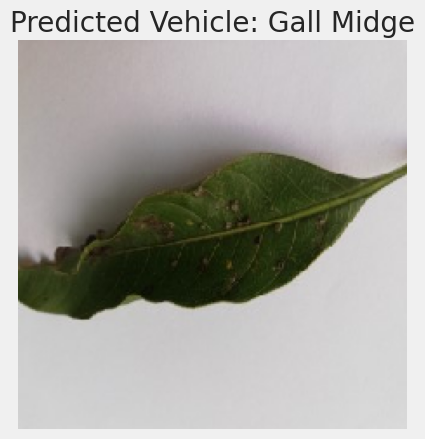

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Gall Midge/IMG_20211106_161226 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 786ms/step


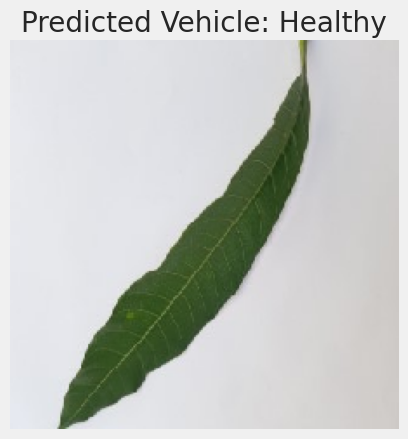

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Healthy/20211231_123625 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 418ms/step


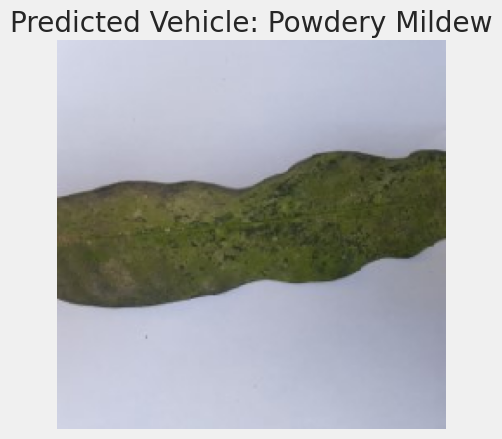

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Powdery Mildew/20211109_121452 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 632ms/step


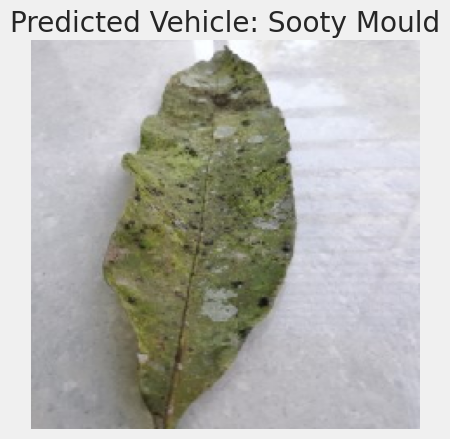

In [ ]:
image_path_to_test = '/content/MangoLeafBD Dataset/Sooty Mould/IMG_20211108_121234 (Custom).jpg'
predict_and_display(image_path_to_test, model, class_labels)